# Analysis — Serie A (20/21 season)

### Data for each TEAM in the top Italian league after Match Week 7

### FBref.com — source DataFrame:

# "DEFENSIVE ACTIONS"

In [1]:
import pandas as pd
#~~~~~~~~~~~~~~~~~~~~
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import os.path
#~~~~~~~~~~~~~~~~~~~~~~
from PIL import Image

In [4]:
import matplotlib.pyplot as plt
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import seaborn as sns
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
%matplotlib inline

In [5]:
#plt.style.use('seaborn-whitegrid')
#plt.style.use('dark_background')
#plt.style.use('fivethirtyeight')

#fig, ax = plt.subplots()

In [6]:
#plt.style.use(['fivethirtyeight','dark_background'])
#plt.style.use(['seaborn','dark_background'])
#plt.style.use(['ggplot','dark_background'])
#plt.style.use(['seaborn-whitegrid','dark_background'])

plt.style.use(
              [
               'bmh',
               'dark_background'
              ]
             )

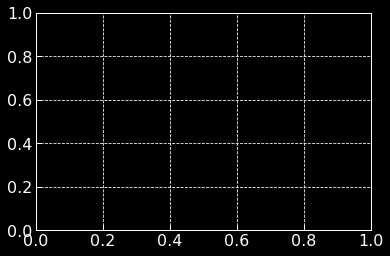

In [7]:
#sns.set_context('notebook')
#sns.set_context('paper')
#sns.set_context('talk')
#sns.set_context('poster')

sns.set_context(
                'paper',
                font_scale = 1.8
               )

fig, ax = plt.subplots()

In [8]:
image_folder_path = ('~/SBNation_Articles_Soccer_Data/' +
                     'Logo_Pictures_for_Data_Sources/')


logos_stacked_path = (image_folder_path +
                      'LOGOS_stacked_FBref_StatsBomb.png')
#logos_stacked_path

logos_flat_path = (image_folder_path +
                   'LOGOS_flat_FBref_StatsBomb.png')
#logos_flat_path

In [9]:
#image_path = os.path.expanduser('~/SBNation_Articles_Soccer_Data/Logo_Pictures_for_Data_Sources/LOGOS_stacked_FBref_StatsBomb.png')

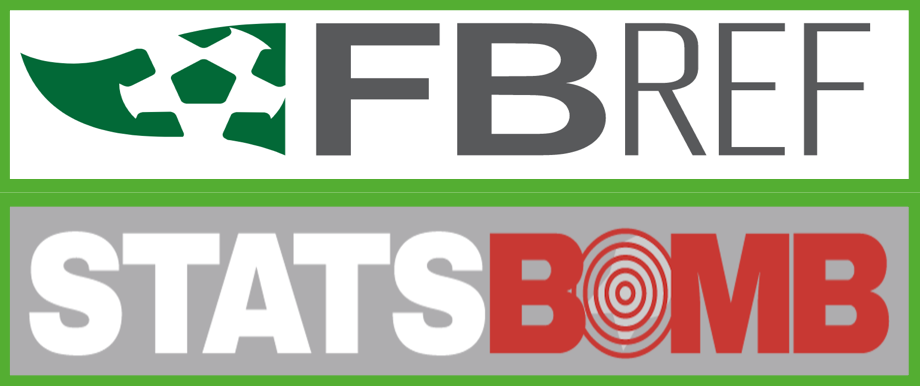

In [10]:
open_stacked_logos = os.path.expanduser(logos_stacked_path)

logos_stacked = Image.open(open_stacked_logos)

logos_stacked   # .show()

In [11]:
stacked_img_width, stacked_img_height = logos_stacked.size

stacked_img_ratio = (stacked_img_width / stacked_img_height)

stacked_img_ratio

2.383419689119171

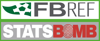

In [12]:
new_size_stacked = (
                    100,

                    int(
                        100 * (
                               1 / stacked_img_ratio
                              )
                       )
                   )

logos_stacked_small = logos_stacked.resize(new_size_stacked)

logos_stacked_small

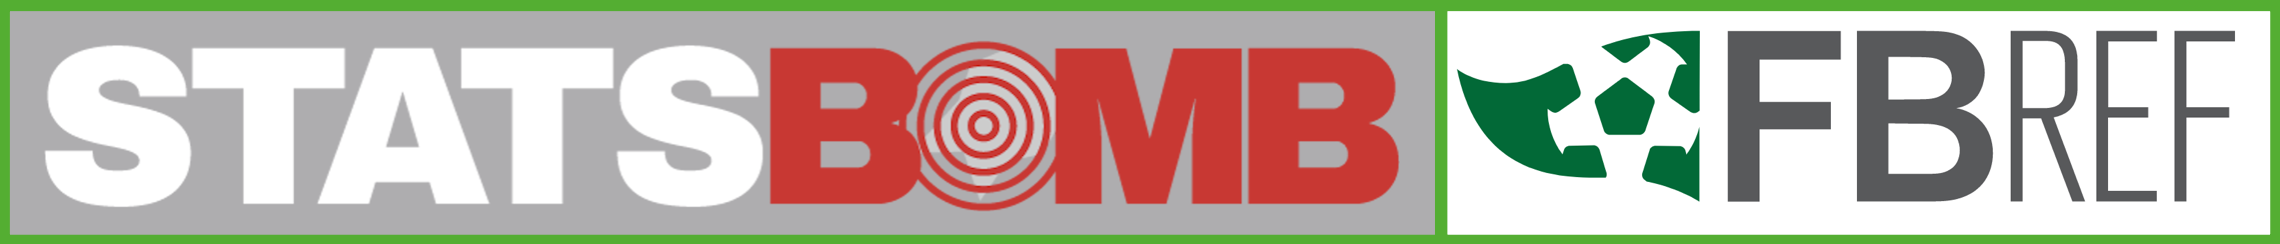

In [13]:
open_flat_logos = os.path.expanduser(logos_flat_path)

logos_flat = Image.open(open_flat_logos)

logos_flat   #  .show()

In [14]:
flat_img_width, flat_img_height = logos_flat.size

flat_img_ratio = (
                  flat_img_width / flat_img_height
                 )

flat_img_ratio

9.344262295081966

In [15]:
new_size_flat = (
                 int(
                     25 * (flat_img_ratio)
                    ),
                 25
                )

logos_flat_small = logos_flat.resize(new_size_flat)

logos_flat_small

## PART (1) — LOAD into DataFrame(s)

In [16]:
Defensive_Actions_df = pd.read_csv(
                                   "Squad_Defensive_Actions.csv"
                                  )
Defensive_Actions_df

,Squad,# Pl,90s,Tkl,TklW,Tkl_Def3rd,Tkl_Mid3rd,Tkl_Att3rd,Tkl_vs_Drib,Att_vs_Drib,...,Press_Mid3rd,Press_Att3rd,Blocks,Block_Sh,ShSv,Block_Pass,Int,Tkl_plus_Int,Clr,Err
0,Atalanta,23,7.0,132,76,48,63,21,31,92,...,528,240,101,20,1,81,61,193,122,0
1,Benevento,21,7.0,104,55,53,39,12,35,111,...,395,198,121,24,0,97,32,136,114,3
2,Bologna,22,7.0,115,71,49,52,14,33,112,...,467,245,131,25,0,106,42,157,173,3
3,Cagliari,22,7.0,131,73,53,57,21,37,124,...,532,296,117,35,0,82,46,177,134,1
4,Crotone,25,7.0,138,91,71,44,23,53,132,...,427,279,102,17,0,85,26,164,99,3
5,Fiorentina,23,7.0,92,57,43,40,9,36,85,...,456,208,102,28,0,74,40,132,131,5
6,Genoa,26,7.0,120,75,57,47,16,40,104,...,405,166,99,13,0,86,48,168,177,6
7,Hellas Verona,26,7.0,86,55,37,44,5,20,70,...,412,194,121,44,0,77,58,144,152,7
8,Inter,22,7.0,106,68,34,48,24,43,97,...,415,288,85,12,0,73,32,138,78,2
9,Juventus,23,6.0,95,65,54,37,4,30,89,...,362,174,107,27,0,80,39,134,107,1


## Columns list:

'Squad',
'# Pl',
'90s',
'Tkl',
'TklW',
'Tkl_Def3rd',
'Tkl_Mid3rd',
'Tkl_Att3rd',
'Tkl_vs_Drib',
'Att_vs_Drib',
'Tkl_Pct_vs_Drib',
'Past_vs_Drib',
'Press',
'Press_Succ',
'Press_Succ_Pct',
'Press_Def3rd',
'Press_Mid3rd',
'Press_Att3rd',
'Blocks',
'Block_Sh',
'ShSv',
'Block_Pass',
'Int',
'Tkl_plus_Int',
'Clr',
'Err'

In [17]:
columns_list = list(
                    Defensive_Actions_df.columns
                   )
columns_list

['Squad',
 '# Pl',
 '90s',
 'Tkl',
 'TklW',
 'Tkl_Def3rd',
 'Tkl_Mid3rd',
 'Tkl_Att3rd',
 'Tkl_vs_Drib',
 'Att_vs_Drib',
 'Tkl_Pct_vs_Drib',
 'Past_vs_Drib',
 'Press',
 'Press_Succ',
 'Press_Succ_Pct',
 'Press_Def3rd',
 'Press_Mid3rd',
 'Press_Att3rd',
 'Blocks',
 'Block_Sh',
 'ShSv',
 'Block_Pass',
 'Int',
 'Tkl_plus_Int',
 'Clr',
 'Err']

In [18]:
TACKLES_and_INTERCEPTIONS = [
                             'Tkl',
                             'TklW',
                             
                             'Int',
                             'Tkl_plus_Int',
                            ]
TACKLES_and_INTERCEPTIONS

['Tkl', 'TklW', 'Int', 'Tkl_plus_Int']

In [19]:
DRIBBLING_defensive_stats = [
                             'Tkl_vs_Drib',
                             'Att_vs_Drib',
    
                             'Tkl_Pct_vs_Drib',
                             'Past_vs_Drib'
                            ]
DRIBBLING_defensive_stats

['Tkl_vs_Drib', 'Att_vs_Drib', 'Tkl_Pct_vs_Drib', 'Past_vs_Drib']

In [20]:
PRESSING_basic_stats = [
                        'Press',
    
                        'Press_Succ',
    
                        'Press_Succ_Pct',
                       ]
PRESSING_basic_stats

['Press', 'Press_Succ', 'Press_Succ_Pct']

In [21]:
Blocks_Errors_Clearances = [
                            'Blocks',
                            'Block_Pass'
    
                            'Block_Sh',
                            'ShSv',
                            
                            'Clr',
                            'Err'
                           ]

Blocks_Errors_Clearances

['Blocks', 'Block_PassBlock_Sh', 'ShSv', 'Clr', 'Err']

In [22]:
TACKLING_by_PITCH_THIRD = [
                           'Tkl_Def3rd',
    
                           'Tkl_Mid3rd',
    
                           'Tkl_Att3rd'
                          ]
TACKLING_by_PITCH_THIRD

['Tkl_Def3rd', 'Tkl_Mid3rd', 'Tkl_Att3rd']

In [23]:
PRESSING_by_PITCH_THIRD = [
                           'Press_Def3rd',
    
                           'Press_Mid3rd',
    
                           'Press_Att3rd'
                          ]
PRESSING_by_PITCH_THIRD

['Press_Def3rd', 'Press_Mid3rd', 'Press_Att3rd']

###  all of the relevant variables here have now been categorized into six groups

1. TACKLES_and_INTERCEPTIONS

,

2. DRIBBLING_defensive_stats

,

3. PRESSING_basic_stats

,

4. Blocks_Errors_Clearances

`
.

...and most significantly...

.

`

5. TACKLING_by_PITCH_THIRD

,

6. PRESSING_by_PITCH_THIRD

## PART (2) — identify RANKINGS per column

In [24]:
Defensive_Action_Ranking_df = Defensive_Actions_df.rank(
                                                        ascending = 0,
                                                  #      '0' = 'False'

                                                        method = 'min'
                                                       )

Defensive_Action_Ranking_df = Defensive_Action_Ranking_df.astype(int)


Defensive_Action_Ranking_df['Squad'] = list(
                                            map(
                                                str.upper,

                                                Defensive_Actions_df['Squad']
                                               )
                                           )
Defensive_Action_Ranking_df

,Squad,# Pl,90s,Tkl,TklW,Tkl_Def3rd,Tkl_Mid3rd,Tkl_Att3rd,Tkl_vs_Drib,Att_vs_Drib,...,Press_Mid3rd,Press_Att3rd,Blocks,Block_Sh,ShSv,Block_Pass,Int,Tkl_plus_Int,Clr,Err
0,ATALANTA,9,1,2,5,15,1,3,14,15,...,2,7,16,14,2,13,1,1,11,19
1,BENEVENTO,19,1,17,19,10,18,14,10,5,...,15,14,4,9,5,4,18,18,14,8
2,BOLOGNA,14,1,11,12,13,5,10,11,4,...,7,6,2,8,5,1,8,11,2,8
3,CAGLIARI,14,1,3,10,10,2,3,7,3,...,1,2,6,2,5,12,6,2,6,13
4,CROTONE,6,1,1,1,1,13,2,1,2,...,11,4,14,16,5,10,20,7,18,8
5,FIORENTINA,9,1,19,18,17,17,16,9,19,...,8,12,14,5,5,18,12,20,7,3
6,GENOA,2,1,7,8,7,12,7,4,8,...,14,18,17,19,5,8,4,5,1,2
7,HELLAS VERONA,2,1,20,19,19,13,19,20,20,...,13,15,4,1,5,16,2,16,5,1
8,INTER,14,1,15,16,20,9,1,2,13,...,12,3,19,20,5,19,18,17,19,12
9,JUVENTUS,9,19,18,17,9,19,20,16,17,...,18,17,10,6,5,14,14,19,17,13


In [25]:
Defensive_Action_Ranking_df.set_index(
                                      'Squad',

                                      inplace = True
                                     )
Defensive_Action_Ranking_df

,# Pl,90s,Tkl,TklW,Tkl_Def3rd,Tkl_Mid3rd,Tkl_Att3rd,Tkl_vs_Drib,Att_vs_Drib,Tkl_Pct_vs_Drib,...,Press_Mid3rd,Press_Att3rd,Blocks,Block_Sh,ShSv,Block_Pass,Int,Tkl_plus_Int,Clr,Err
Squad,,,,,,,,,,,,,,,,,,,,,
ATALANTA,9,1,2,5,15,1,3,14,15,9,...,2,7,16,14,2,13,1,1,11,19
BENEVENTO,19,1,17,19,10,18,14,10,5,11,...,15,14,4,9,5,4,18,18,14,8
BOLOGNA,14,1,11,12,13,5,10,11,4,14,...,7,6,2,8,5,1,8,11,2,8
CAGLIARI,14,1,3,10,10,2,3,7,3,13,...,1,2,6,2,5,12,6,2,6,13
CROTONE,6,1,1,1,1,13,2,1,2,3,...,11,4,14,16,5,10,20,7,18,8
FIORENTINA,9,1,19,18,17,17,16,9,19,2,...,8,12,14,5,5,18,12,20,7,3
GENOA,2,1,7,8,7,12,7,4,8,6,...,14,18,17,19,5,8,4,5,1,2
HELLAS VERONA,2,1,20,19,19,13,19,20,20,15,...,13,15,4,1,5,16,2,16,5,1
INTER,14,1,15,16,20,9,1,2,13,1,...,12,3,19,20,5,19,18,17,19,12


In [26]:
Defensive_Action_Ranks_Transposed = Defensive_Action_Ranking_df.transpose()

Defensive_Action_Ranks_Transposed

Squad,ATALANTA,BENEVENTO,BOLOGNA,CAGLIARI,CROTONE,FIORENTINA,GENOA,HELLAS VERONA,INTER,JUVENTUS,LAZIO,MILAN,NAPOLI,PARMA,ROMA,SAMPDORIA,SASSUOLO,SPEZIA,TORINO,UDINESE
# Pl,9,19,14,14,6,9,2,2,14,9,6,9,14,2,19,8,9,1,14,2
90s,1,1,1,1,1,1,1,1,1,19,1,1,19,1,1,1,1,1,1,1
Tkl,2,17,11,3,1,19,7,20,15,18,6,9,12,7,16,14,4,12,9,5
TklW,5,19,12,10,1,18,8,19,16,17,4,2,5,9,14,10,5,12,14,2
Tkl_Def3rd,15,10,13,10,1,17,7,19,20,9,13,6,8,2,18,16,3,12,4,5
Tkl_Mid3rd,1,18,5,2,13,17,12,13,9,19,3,7,9,15,4,6,15,9,19,7
Tkl_Att3rd,3,14,10,3,2,16,7,19,1,20,6,16,15,18,13,10,3,10,7,9
Tkl_vs_Drib,14,10,11,7,1,9,4,20,2,16,7,12,6,14,17,17,3,5,12,19
Att_vs_Drib,15,5,4,3,2,19,8,20,13,17,1,16,13,6,11,12,7,8,10,18
Tkl_Pct_vs_Drib,9,11,14,13,3,2,6,15,1,9,17,8,4,16,20,19,5,7,12,18


Inter_Ranks = list(Defensive_Action_Ranks_Transposed['INTER'])

.

Inter_Ranks.info() >=>=>=>  AttributeError: 'Series' object has no attribute 'info'

Inter_Ranks.shape  >=>~>=>  (25,) 

.

Defensive_Variables = Defensive_Action_Ranks_Transposed.index.tolist()

.

Inter_Def_Ranks_Series = list(zip(Defensive_Variables, Inter_Ranks))

.

Inter_Rankings_df = pd.DataFrame(
                                 Inter_Def_Ranks_Series,
                                 columns = [
                                            'Defensive_Variable',
                                            'INTER'
                                           ]
                                )
Inter_Rankings_df

In [27]:
Defensive_Action_Ranks_Transposed.reset_index(
                                              inplace = True
                                             )
Defensive_Action_Ranks_Transposed.rename(
                                         columns = {
                                                    'index':'SQUAD'
                                                   },
                                         # order = {
#                                                    'OLD' : 'NEW'
#                                                  }
                                        # index = {'Squad' : 'Index'},
    
                                         inplace = True
                                        )
Defensive_Action_Ranks_Transposed

Squad,SQUAD,ATALANTA,BENEVENTO,BOLOGNA,CAGLIARI,CROTONE,FIORENTINA,GENOA,HELLAS VERONA,INTER,...,LAZIO,MILAN,NAPOLI,PARMA,ROMA,SAMPDORIA,SASSUOLO,SPEZIA,TORINO,UDINESE
0,# Pl,9,19,14,14,6,9,2,2,14,...,6,9,14,2,19,8,9,1,14,2
1,90s,1,1,1,1,1,1,1,1,1,...,1,1,19,1,1,1,1,1,1,1
2,Tkl,2,17,11,3,1,19,7,20,15,...,6,9,12,7,16,14,4,12,9,5
3,TklW,5,19,12,10,1,18,8,19,16,...,4,2,5,9,14,10,5,12,14,2
4,Tkl_Def3rd,15,10,13,10,1,17,7,19,20,...,13,6,8,2,18,16,3,12,4,5
5,Tkl_Mid3rd,1,18,5,2,13,17,12,13,9,...,3,7,9,15,4,6,15,9,19,7
6,Tkl_Att3rd,3,14,10,3,2,16,7,19,1,...,6,16,15,18,13,10,3,10,7,9
7,Tkl_vs_Drib,14,10,11,7,1,9,4,20,2,...,7,12,6,14,17,17,3,5,12,19
8,Att_vs_Drib,15,5,4,3,2,19,8,20,13,...,1,16,13,6,11,12,7,8,10,18
9,Tkl_Pct_vs_Drib,9,11,14,13,3,2,6,15,1,...,17,8,4,16,20,19,5,7,12,18


In [28]:
Defensive_Action_Rankings = Defensive_Action_Ranks_Transposed.sort_values(
                                                                          'INTER'
                                                                         )
Defensive_Action_Rankings

Squad,SQUAD,ATALANTA,BENEVENTO,BOLOGNA,CAGLIARI,CROTONE,FIORENTINA,GENOA,HELLAS VERONA,INTER,...,LAZIO,MILAN,NAPOLI,PARMA,ROMA,SAMPDORIA,SASSUOLO,SPEZIA,TORINO,UDINESE
1,90s,1,1,1,1,1,1,1,1,1,...,1,1,19,1,1,1,1,1,1,1
6,Tkl_Att3rd,3,14,10,3,2,16,7,19,1,...,6,16,15,18,13,10,3,10,7,9
13,Press_Succ_Pct,5,8,11,13,9,12,13,15,1,...,5,4,7,15,17,18,2,19,20,10
9,Tkl_Pct_vs_Drib,9,11,14,13,3,2,6,15,1,...,17,8,4,16,20,19,5,7,12,18
7,Tkl_vs_Drib,14,10,11,7,1,9,4,20,2,...,7,12,6,14,17,17,3,5,12,19
16,Press_Att3rd,7,14,6,2,4,12,18,15,3,...,10,8,5,20,19,1,13,9,16,11
19,ShSv,2,5,5,5,5,5,5,5,5,...,5,5,5,2,5,5,5,5,1,2
12,Press_Succ,4,13,8,3,7,11,17,18,6,...,1,2,16,9,20,5,12,15,19,14
5,Tkl_Mid3rd,1,18,5,2,13,17,12,13,9,...,3,7,9,15,4,6,15,9,19,7
15,Press_Mid3rd,2,15,7,1,11,8,14,13,12,...,3,6,20,9,10,4,19,5,17,16


In [29]:
Defensive_Action_Rankings.reset_index(
                                      inplace = True,

                                      drop = True
                                     )
Defensive_Action_Rankings

Squad,SQUAD,ATALANTA,BENEVENTO,BOLOGNA,CAGLIARI,CROTONE,FIORENTINA,GENOA,HELLAS VERONA,INTER,...,LAZIO,MILAN,NAPOLI,PARMA,ROMA,SAMPDORIA,SASSUOLO,SPEZIA,TORINO,UDINESE
0,90s,1,1,1,1,1,1,1,1,1,...,1,1,19,1,1,1,1,1,1,1
1,Tkl_Att3rd,3,14,10,3,2,16,7,19,1,...,6,16,15,18,13,10,3,10,7,9
2,Press_Succ_Pct,5,8,11,13,9,12,13,15,1,...,5,4,7,15,17,18,2,19,20,10
3,Tkl_Pct_vs_Drib,9,11,14,13,3,2,6,15,1,...,17,8,4,16,20,19,5,7,12,18
4,Tkl_vs_Drib,14,10,11,7,1,9,4,20,2,...,7,12,6,14,17,17,3,5,12,19
5,Press_Att3rd,7,14,6,2,4,12,18,15,3,...,10,8,5,20,19,1,13,9,16,11
6,ShSv,2,5,5,5,5,5,5,5,5,...,5,5,5,2,5,5,5,5,1,2
7,Press_Succ,4,13,8,3,7,11,17,18,6,...,1,2,16,9,20,5,12,15,19,14
8,Tkl_Mid3rd,1,18,5,2,13,17,12,13,9,...,3,7,9,15,4,6,15,9,19,7
9,Press_Mid3rd,2,15,7,1,11,8,14,13,12,...,3,6,20,9,10,4,19,5,17,16


In [30]:
Inter_Rankings_df = (
                     Defensive_Action_Rankings[
                                               [
                                                'SQUAD',
                                                'INTER'
                                               ]
                                              ]
                     .rename(
                             columns = {
                                        'SQUAD' : 'Defensive_Variable'
                                       }
# renamed column input order ~~~~~~~~> {'OLD' : 'NEW'}
                            )
                     .set_index(
                                'Defensive_Variable'
                               )
                    )
Inter_Rankings_df

Squad,INTER
Defensive_Variable,
90s,1
Tkl_Att3rd,1
Press_Succ_Pct,1
Tkl_Pct_vs_Drib,1
Tkl_vs_Drib,2
Press_Att3rd,3
ShSv,5
Press_Succ,6
Tkl_Mid3rd,9


In [31]:
#Inter_Rankings_df.info

#  < bound method DataFrame.info of      Squad       INTER
#   Defensive_Variable
#
#   90s                  1
#   Tkl_Att3rd           1
#   Press_Succ_Pct       1
#   Tkl_Pct_vs_Drib      1
#   Tkl_vs_Drib          2
#   Press_Att3rd         3
#   ShSv                 5
#   Press_Succ           6
#   Tkl_Mid3rd           9
#   .                    .
#   .                    .
#   .                    .
#   Block_Pass          19
#   Tkl_Def3rd          20
#   Block_Sh            20 >


#Inter_Rankings_df.shape    #~~~~~~~~>   (25,1)
#Inter_Rankings_df.values    #~~~~~~~>   array

#Inter_Rankings_df.index  #~~~> dtype='object', name='Defensive_Variable'

<AxesSubplot:ylabel='Frequency'>

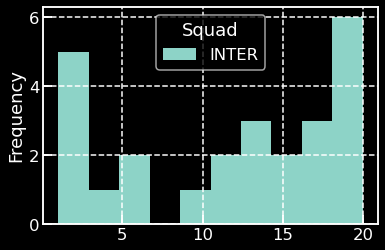

In [32]:
sns.set_context('talk')

Inter_Rankings_df.plot.hist()

In [33]:
Inter_Ranking_Value_Counts = (
                              Inter_Rankings_df[
                                                'INTER'
                                               ]
                              .value_counts()
                              
                              .reset_index(
                                           name = 'Distinct_Variable_Count'
                                          )
                              .rename(
                                      columns = {
                                                 'index':'Defensive_Stat_Rank'
                                                }
                                     )
                              .sort_values(
                                           'Defensive_Stat_Rank'
                                          )
                             )
Inter_Ranking_Value_Counts

,Defensive_Stat_Rank,Distinct_Variable_Count
0,1,4
14,2,1
13,3,1
12,5,1
11,6,1
10,9,1
5,12,2
4,13,2
9,14,1
8,15,1


In [34]:
TACKLING_by_PITCH_THIRD

['Tkl_Def3rd', 'Tkl_Mid3rd', 'Tkl_Att3rd']

In [35]:
TACKLING_by_PITCH_THIRD_df = (#Defensive_Action_Ranking_df[ # 'Squad' #~~~> index is...
                                                            #  ...automatically included
                              Defensive_Actions_df[
                                                   [
                                                    'Squad',
                                                    
                                                    'Tkl_Def3rd',
                                                    'Tkl_Mid3rd',
                                                    'Tkl_Att3rd'
                                                   ]
                                                  ]
                              .sort_values(
                                           'Tkl_Att3rd',
                                           ascending = False
                                          )
                              .set_index(
                                         'Squad'
                                        )
                             )
TACKLING_by_PITCH_THIRD_df

,Tkl_Def3rd,Tkl_Mid3rd,Tkl_Att3rd
Squad,,,
Inter,34,48,24
Crotone,71,44,23
Atalanta,48,63,21
Sassuolo,66,43,21
Cagliari,53,57,21
Lazio,49,55,17
Genoa,57,47,16
Torino,65,37,16
Udinese,61,50,15


In [36]:
PRESSING_by_PITCH_THIRD

['Press_Def3rd', 'Press_Mid3rd', 'Press_Att3rd']

In [37]:
PRESSING_by_PITCH_THIRD_df = (
                              Defensive_Actions_df[
                                                   [
                                                    'Squad',
                                                    
                                                    'Press_Def3rd',
                                                    'Press_Mid3rd',
                                                    'Press_Att3rd'
                                                   ]
                                                  ]
                              .sort_values(
                                           'Press_Att3rd',
                                           ascending = False
                                          )
                              .set_index(
                                         'Squad'
                                        )
                             )
PRESSING_by_PITCH_THIRD_df

,Press_Def3rd,Press_Mid3rd,Press_Att3rd
Squad,,,
Sampdoria,433,501,301
Cagliari,412,532,296
Inter,205,415,288
Crotone,316,427,279
Napoli,232,310,272
Bologna,371,467,245
Atalanta,285,528,240
Milan,337,490,238
Spezia,288,500,227


## PART (3) — actually PLOTTING the data

<AxesSubplot:ylabel='Squad'>

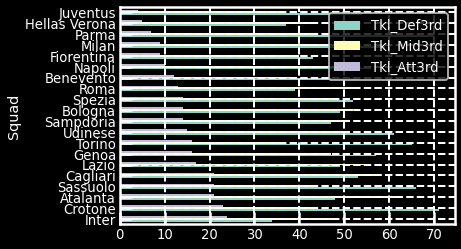

In [38]:
sns.set_context(
                'poster',
                font_scale = 0.6     # 1.4
               )

TACKLING_by_PITCH_THIRD_df.plot.barh()

<AxesSubplot:xlabel='Squad'>

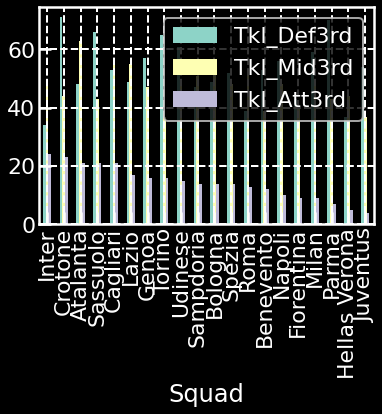

In [39]:
sns.set_context(
                'poster',
                font_scale = 1    # .4
               )

TACKLING_by_PITCH_THIRD_df.plot.bar()

<AxesSubplot:xlabel='Squad'>

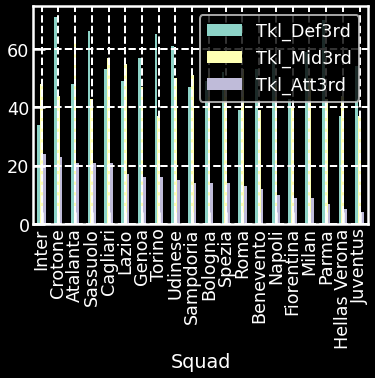

In [40]:
sns.set_context('poster',
                font_scale = 0.8
               )

TACKLING_by_PITCH_THIRD_df.plot(
                                kind = 'bar'   #  , rot=0
                               )

# PART (3) - actually PLOTTING the data

#### define STRINGS for subtitle and for naming myself + S.O.M.

In [41]:
# identify the source time period in SUBTITLE:

subtitle = ' Serie A  (20/21)  data after  Match Week 7'


# duplicate that variable, except spread across 2 lines:

subtitle_2_lines = ('Serie A  (20/21 season)' +
                    '\n' +
                    'data after Match Week 7')

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# attribute this work to "InterPool" specifically for S.O.M.:

prod_by_and_for = ('produced by \"InterPool\" for SB Nation\'s  ' +
                   '\n' +
                   'Inter Milan site: Serpents Of Madonnina ')

# GROUPED BAR CHARTS

## Define FUNCTION to label Y-value above each bar:

In [42]:
def label_bar_y_vals(bar_group, x_offset):
    
    for each_bar in bar_group:
        
        bar_height = each_bar.get_height()
        
        ax.annotate('{}'.format(bar_height),
                    
                    xy = (each_bar.get_x() +
                          each_bar.get_width() / 2,
                          bar_height
                         ),
                    
                    xytext = (x_offset, # horizontal offset variable input
                              2   # 2 pts vertical offset
                             ),
                    
                    textcoords = 'offset points',
                    
                    ha = 'center',  # horizontal alignment
                    va = 'bottom'   # vertical alignment
                   )

## GROUPED BAR CHART number 1:

### TACKLING by THIRD of the PITCH

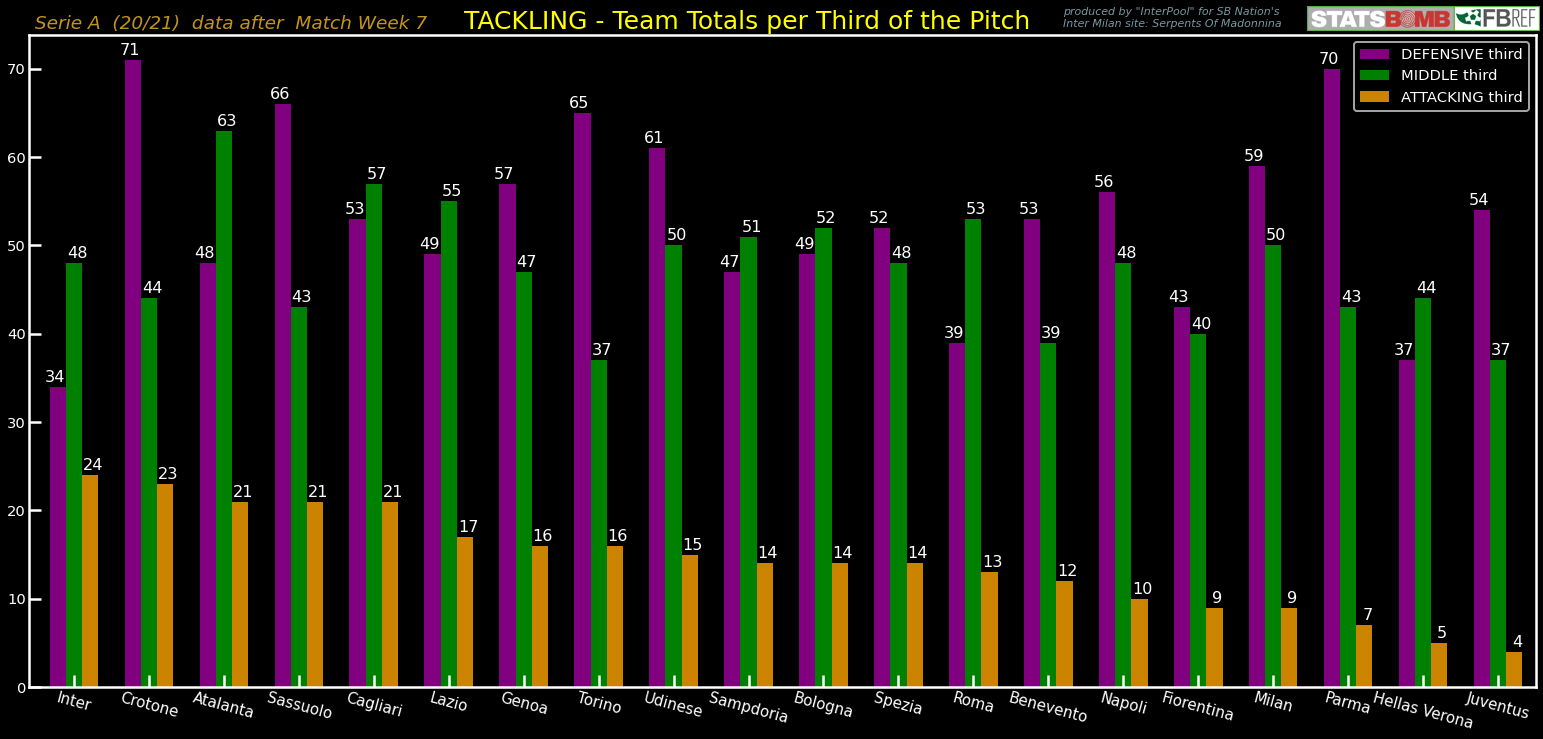

In [43]:
sns.set_context(
                'poster',
                font_scale = 0.67   # 0.65   # 0.8   # 2.4
               )

fig, ax = plt.subplots(figsize = (# NOTE - figsize defined by INCHES
                                  # 120,  # horizontal WIDTH
                                  # 60    # vertical HEIGHT

                                  27,  #45, #12,  #  WIDTH redefined in INCHES
                                  12    #20  #6   #  HEIGHT redefined in INCHES
                                 )
                      )

# set the positions and width for the bars

pos_list = list(
                range(
                      len(TACKLING_by_PITCH_THIRD_df['Tkl_Def3rd']
                         )
                     )
               )
pos = [each_pos * 3 for each_pos in pos_list]

width = 0.65    # 0.35   # 0.2   # 0.3




# create the bars, in position pos, for Y-axis Variable #1

bar_group_1 = plt.bar(pos,
                      TACKLING_by_PITCH_THIRD_df['Tkl_Def3rd'],
                      width,   # alpha = 0.9,
                      color = 'purple'
                     ) 

# create bars, in position pos + width buffer, for Y-axis Variable #2

bar_group_2 = plt.bar([(
                        p + width
                       ) for p in pos
                      ],
                      
                      TACKLING_by_PITCH_THIRD_df['Tkl_Mid3rd'],
                      
                      width,   # alpha = 0.9,
                      color = 'green'    # 'yellow'   # 'lightblue'
                     )

# create bars, in position pos + width buffer, for Y-axis Variable #3

bar_group_3 = plt.bar([(
                        p + width*2
                       ) for p in pos
                      ],
                      
                      TACKLING_by_PITCH_THIRD_df['Tkl_Att3rd'],
                      
                      width,
                      alpha = 0.8,
                      color = 'orange'
                     )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#ax.set_title('Test', fontsize = 60)

#plt.title('TACKLING - Team Totals per Third of the Pitch - Serie A (20/21) after matchweek 7',
#          fontsize = 25,
#          color = 'lightblue')    # 'yellow'    # 'goldenrod'

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# identify the source variables in MAIN TITLE:

plt.title(('TACKLING - Team Totals per Third of the Pitch     ' +
           '    '
          ),
          
          fontsize = 25,
          color = 'yellow'
         )


# identify the source time period in SUBTITLE:

plt.title(subtitle,

          loc = 'left',
          
          fontsize = 18.5,   # 22,
          
          alpha = 0.9,
          
          style = 'italic',
          
          color = 'goldenrod'
         )


# attribute this work to "InterPool" specifically for S.O.M.

plt.text(40.25,

         74.75,    # 2790,
         
         prod_by_and_for,
         
         fontsize = 11,
         
         alpha = 0.7,
          
         style = 'italic',
         
         color = 'lightblue'
        )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# NOTE -- X and Y values for "figimage" origin are defined in PIXELS

plt.figimage(logos_flat_small,
             1307,
             708
            )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# now setting "ax" instead of "plt" for ticks and tick labels...???

ax.set_xticks(
              [
               (p + width
               ) for p in pos
              ]
             )

ax.set_xticklabels(TACKLING_by_PITCH_THIRD_df.index,
                   
                   fontsize = 15,
                   
                   rotation = 345
                  )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# back to setting "plt" instead of "ax" now...???

plt.xlim(
         min(pos) - (width * 1.75),
         max(pos) + (width * 3.35)
        )

plt.ylim([
          0,
          (max(
               TACKLING_by_PITCH_THIRD_df['Tkl_Def3rd']
#              + TACKLING_by_PITCH_THIRD_df['Tkl_Mid3rd']
#              + TACKLING_by_PITCH_THIRD_df['Tkl_Att3rd']
              
              ) * 1.04)   #  * 1.03)
         ])

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.legend(
           [
            'DEFENSIVE third',
            'MIDDLE third',
            'ATTACKING third'
           ],

           loc = 'upper right'
          )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# use the custom function defined above to...
# ...label the y-values for each bar in each bar group

label_bar_y_vals(bar_group_1,
                 -3  # x_offset variable
                )

label_bar_y_vals(bar_group_2,
                 3  # x_offset variable
                )

label_bar_y_vals(bar_group_3,
                 3  # x_offset variable
                )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.grid()

plt.show()

## GROUPED BAR CHART number 2:

### PRESSING by THIRD of the PITCH

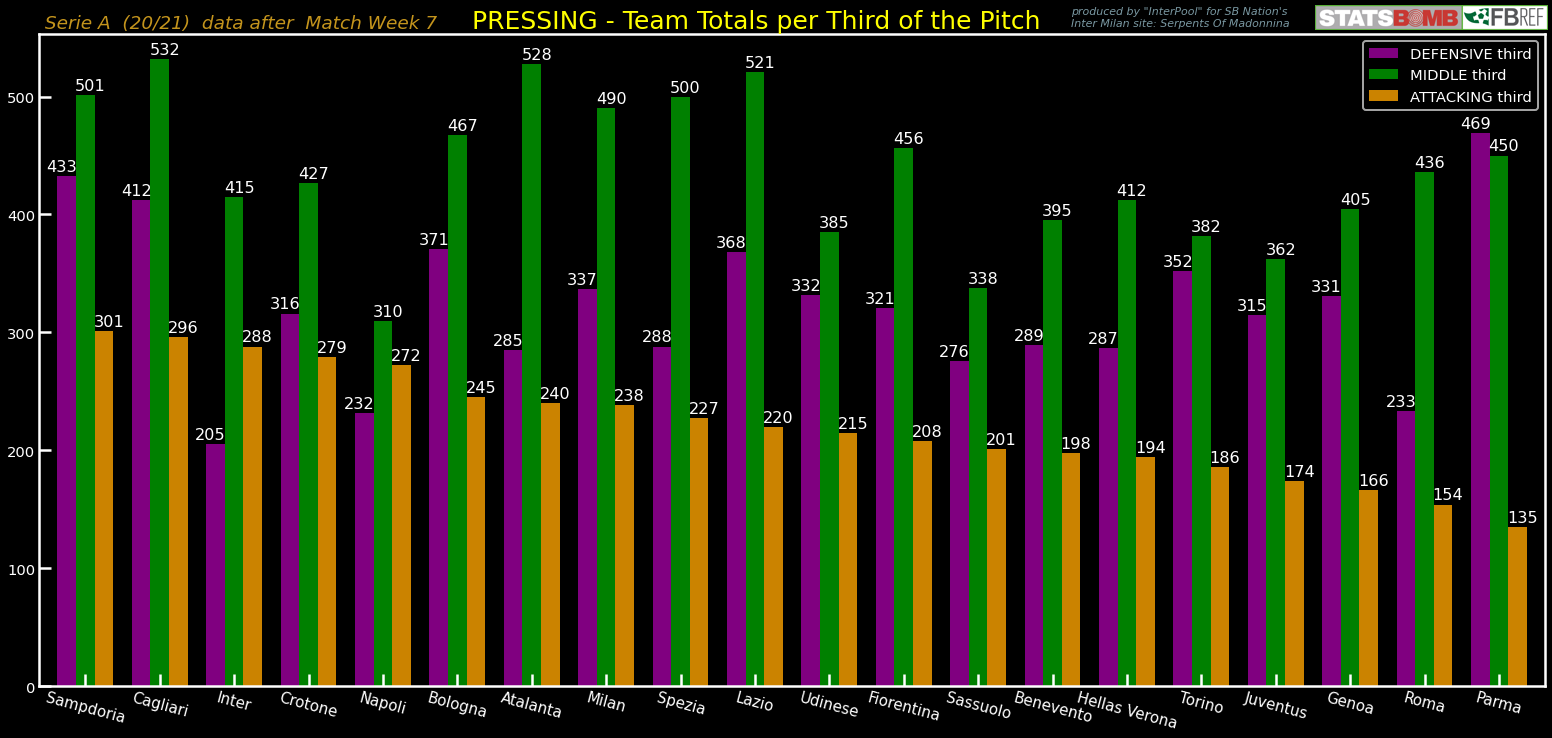

In [44]:
sns.set_context(
                'poster',
                font_scale = 0.67   # 0.65   # 0.8   # 2.4
               )

fig, ax = plt.subplots(figsize = (# NOTE - figsize defined by INCHES
                                  # 120,  # horizontal WIDTH
                                  # 60    # vertical HEIGHT

                                  27,  #45, #12,  #  WIDTH redefined in INCHES
                                  12    #20  #6   #  HEIGHT redefined in INCHES
                                 )
                      )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

pos = list(range(
                 len(
                     PRESSING_by_PITCH_THIRD_df['Press_Def3rd']
                    )
                ))
width = 0.25

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# create the bars, in position pos, for Y-axis Variable #1
bar_group_1 = plt.bar(
                      pos,
                      
                      PRESSING_by_PITCH_THIRD_df['Press_Def3rd'],
                      
                      width, #alpha = 0.9,
                      color = 'purple'
                     ) 

# create bars, in position pos + width buffer, for Y-axis Variable #2
bar_group_2 = plt.bar([
                       (p + width
                       ) for p in pos
                      ],
                      
                      PRESSING_by_PITCH_THIRD_df['Press_Mid3rd'],
                      
                      width, #alpha = 0.9,
                      color = 'green'
                     ) 

# create bars, in position pos + width buffer, for Y-axis Variable #3
bar_group_3 = plt.bar([
                       (p + width*2
                       ) for p in pos
                      ],
                      
                      PRESSING_by_PITCH_THIRD_df['Press_Att3rd'],
                      
                      width,
                      alpha = 0.8,
                      color = 'orange'
                     )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#plt.title('PRESSING - Team Totals per Third of the Pitch - Serie A (20/21) after matchweek 7',
#          fontsize = 25,        # 150,   # 100,
#          color = 'lightblue')    # 'yellow'    # 'goldenrod'

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# identify the source variables in MAIN TITLE:

plt.title(('PRESSING - Team Totals per Third of the Pitch     ' +
           '    '
          ),
          
          fontsize = 25,
          color = 'yellow'
         )


# identify the source time period in SUBTITLE:

plt.title(subtitle,

          loc = 'left',
          
          fontsize = 18.5,   # 22,
          
          alpha = 0.9,
          
          style = 'italic',
          
          color = 'goldenrod'
         )


# attribute this work to "InterPool" specifically for S.O.M.

plt.text(13.5,          # 18,          # 40.25,

         560,         # 74.75,       # 2790,
         
         prod_by_and_for,
         
         fontsize = 11,
         
         alpha = 0.7,
          
         style = 'italic',
         
         color = 'lightblue'
        )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# NOTE -- X and Y values for "figimage" origin are defined in PIXELS

plt.figimage(logos_flat_small,
             
             1315,    # 1307,
             708
            )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# now setting "ax" instead of "plt" for ticks and tick labels...???

ax.set_xticks(
              [
               (p + width
               ) for p in pos
              ]                  #  , rot = 90
             )

ax.set_xticklabels(
                   PRESSING_by_PITCH_THIRD_df.index,
                   
                   fontsize = 15,
                   
                   rotation = 345
                  )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# back to setting "plt" instead of "ax" now...???

plt.xlim(
         min(pos) - (width * 1.5),
         max(pos) + (width * 3.5)
        )

plt.ylim([
          0,
          (max(
#               PRESSING_by_PITCH_THIRD_df['Press_Def3rd'] +
               PRESSING_by_PITCH_THIRD_df['Press_Mid3rd']
#            + PRESSING_by_PITCH_THIRD_df['Press_Att3rd']
              
              ) * 1.04)
         ])

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.legend(
           [
            'DEFENSIVE third',
            'MIDDLE third',
            'ATTACKING third'
           ],

           loc = 'upper right'
          )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# use the custom function defined above to...
# ...label the y-values for each bar in each bar group

label_bar_y_vals(bar_group_1,
                 -5  # x_offset variable
                )

label_bar_y_vals(bar_group_2,
                 5  # x_offset variable
                )

label_bar_y_vals(bar_group_3,
                 5  # x_offset variable
                )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.grid()

plt.show()

# SCATTERPLOTS

### Total PRESSURES vs Pressure SUCCESS RATE (all Serie A teams)

6

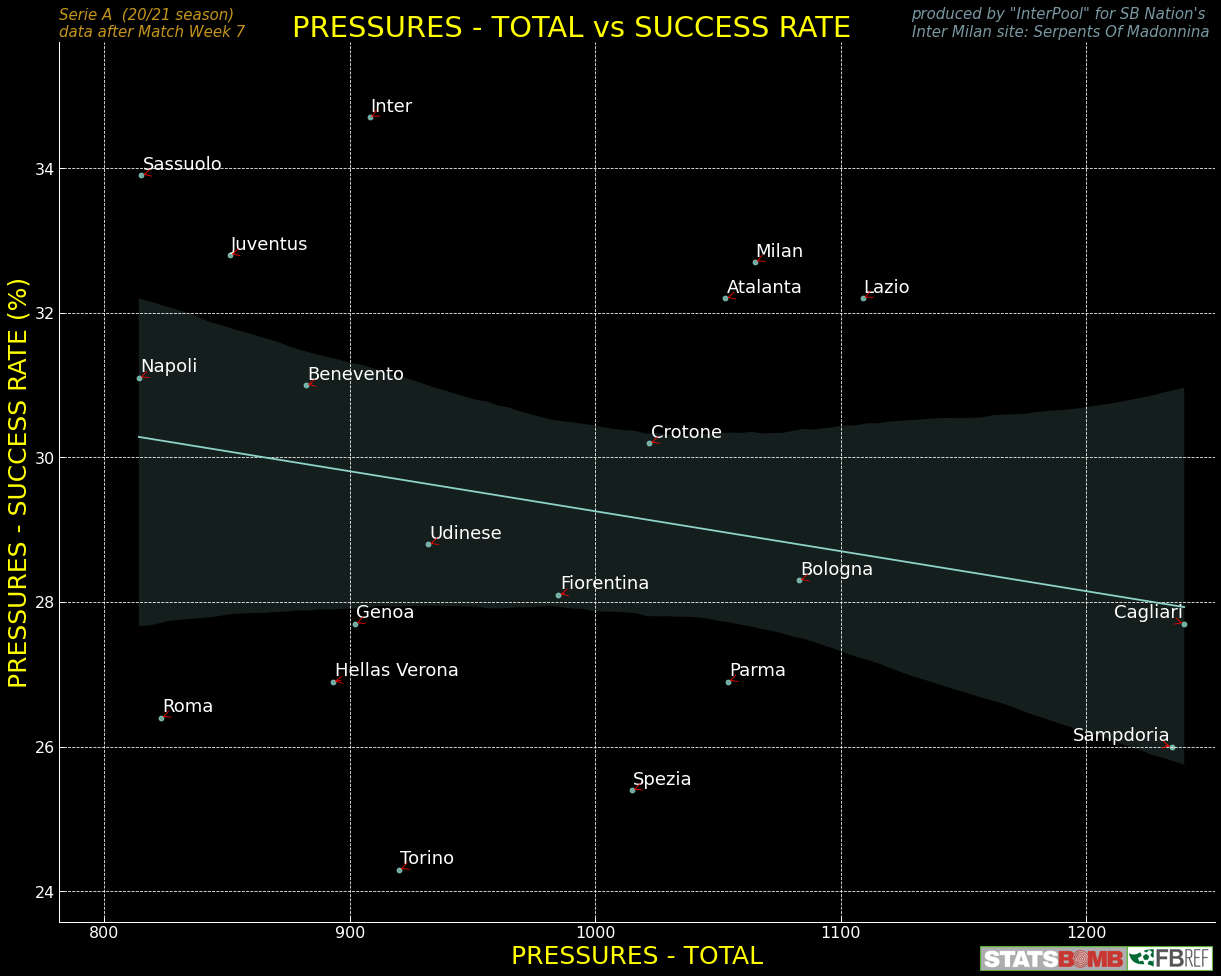

In [45]:
sns.set_context(
                'paper',            # font_scale = 2
                font_scale = 1.8
               )

#plt.margins(0.5, 0.5)


ax = sns.lmplot(
                x = 'Press',                       # horizontal axis
    
                y = 'Press_Succ_Pct',               #  vertical axis
                
                data = Defensive_Actions_df,      # data source

                fit_reg = True,
                #fit_reg = False,         # for *NO* regression line
                
                height = 13,              
                aspect = 1.3      #  dimension of x-axis (sets width)
               )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#plt.margins(x = 50, y = 50)
#ax.margins(x = 0.5,y = 0.5)
#plt.margins(0.5, 0.5)

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

x_col_min = Defensive_Actions_df['Press'].min()
x_col_max = Defensive_Actions_df['Press'].max()

y_col_min = Defensive_Actions_df['Press_Succ_Pct'].min()
y_col_max = Defensive_Actions_df['Press_Succ_Pct'].max()

#plt.xlim((x_col_min - 1), (x_col_max + 1))
#plt.ylim((y_col_min - 1), (y_col_max + 1))

plt.xlim(
         (x_col_min * 0.96),
         (x_col_max * 1.01)
        )
plt.ylim(
         (y_col_min * 0.97),
         (y_col_max * 1.03)
        )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#  COLOR REFERENCE:
#    https://matplotlib.org/gallery/color/named_colors.html

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# identify the source variables in MAIN TITLE:

plt.suptitle('PRESSURES - TOTAL vs SUCCESS RATE     ',
             
             x = 0.475,
             y = 1.01,
             
             fontsize = 29,
             
             color = 'yellow'
            )


# identify the source time period in SUBTITLE:

plt.title(
          subtitle_2_lines,
          
          loc = 'left',

          fontsize = 15,
          
          alpha = 0.9,
          
          style = 'italic',

          color = 'goldenrod'
         )


# attribute this work to "InterPool" specifically for S.O.M.

plt.title(prod_by_and_for,
          
          loc = 'right',
          
          fontsize = 15,
          
          alpha = 0.7,
          
          style = 'italic',
          
          color = 'lightblue'
         )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.xlabel(
           'PRESSURES - TOTAL',
    
           fontsize = 25,
    
           color = 'yellow'
          )

plt.ylabel(
           'PRESSURES - SUCCESS RATE (%)',
    
           fontsize = 25,
    
           color = 'yellow'
          )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.figimage(
             logos_flat_small,
             
             980,   # 1090
             5
            )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

point_labels = [
                plt.text(
                         Defensive_Actions_df.Press[i],
                    
                         Defensive_Actions_df.Press_Succ_Pct[i],
                         
                         Defensive_Actions_df.Squad[i],
                    
                         fontsize = 18
                         
                        ) for i in range(
                                         len(
                                             Defensive_Actions_df.Squad
                                            )
                                        )
               ]
adjust_text(
            point_labels,
    
            arrowprops = dict(
                              arrowstyle = '->',
                              color = 'red'
                             )
           )

### PRESSURE SUCCESS RATE vs Total ERRORS

5

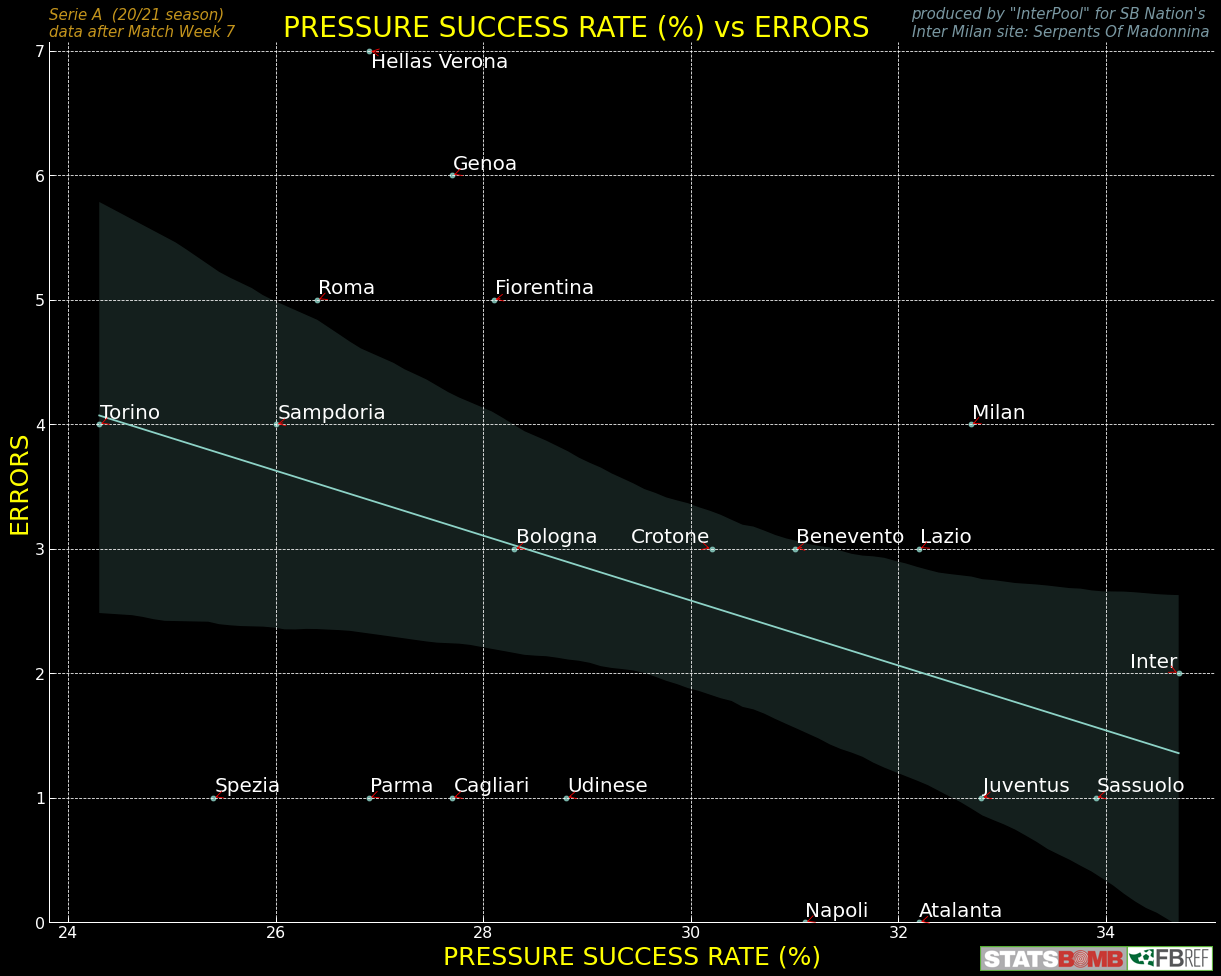

In [46]:
sns.set_context(
                'paper',
                font_scale = 1.8    # 2
               )

#plt.margins(0.5, 0.5)

ax = sns.lmplot(
                x = 'Press_Succ_Pct',      # horizontal axis
    
                y = 'Err',               # vertical axis
                
                data = Defensive_Actions_df,      # data source

                fit_reg = True,
                #fit_reg = False,         # for *NO* regression line
                
                height = 13,              
                aspect = 1.3      #  dimension of x-axis (sets width)
               )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

x_col_min = Defensive_Actions_df['Press_Succ_Pct'].min()
x_col_max = Defensive_Actions_df['Press_Succ_Pct'].max()

y_col_min = Defensive_Actions_df['Err'].min()
y_col_max = Defensive_Actions_df['Err'].max()


plt.xlim(
         (x_col_min * 0.98),
         (x_col_max * 1.01)
        )
plt.ylim(
         (y_col_min * 0.97),
         (y_col_max * 1.01)
        )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#  COLOR REFERENCE:
#    https://matplotlib.org/gallery/color/named_colors.html

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#plt.title('PRESSURE SUCCESS RATE (%) vs ERRORS - Serie A (20/21) after matchweek 7',
#          fontsize = 26,
#          color = 'goldenrod')

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### identify the source variables in MAIN TITLE:

plt.suptitle('PRESSURE SUCCESS RATE (%) vs ERRORS    ',
             
             x = 0.475,
             y = 1.01,
             
             fontsize = 28,
             
             color = 'yellow'
            )


### identify the source time period in SUBTITLE:

plt.title(
          subtitle_2_lines,
          
          loc = 'left',

          fontsize = 15,
          
          alpha = 0.9,
          
          style = 'italic',

          color = 'goldenrod'
         )


### attribute this work to "InterPool" specifically for S.O.M.

plt.title(prod_by_and_for,
          
          loc = 'right',
          
          fontsize = 15,
          
          alpha = 0.7,
          
          style = 'italic',
          
          color = 'lightblue'
         )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.xlabel(
           'PRESSURE SUCCESS RATE (%)',
    
           fontsize = 25,
    
           color = 'yellow'
          )

plt.ylabel(
           'ERRORS',
    
           fontsize = 25,
    
           color = 'yellow'
          )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.figimage(
             logos_flat_small,
             
             980,   # 1090
             5
            )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

point_labels = [
                plt.text(
                         Defensive_Actions_df.Press_Succ_Pct[i],
                    
                         Defensive_Actions_df.Err[i],
                         
                         Defensive_Actions_df.Squad[i],
                    
                         fontsize = 20
                         
                        ) for i in range(
                                         len(
                                             Defensive_Actions_df.Squad
                                            )
                                        )
               ]
adjust_text(
            point_labels,
    
            arrowprops = dict(
                              arrowstyle = '->',
                              color = 'red'
                             )
           )

# NOTE TO SELF:

Add in the "points" column from the league table,

then use that to determine the scatter dot size for each team

### TACKLES in ATTACKING vs DEFENSIVE Third (all Serie A teams)

6

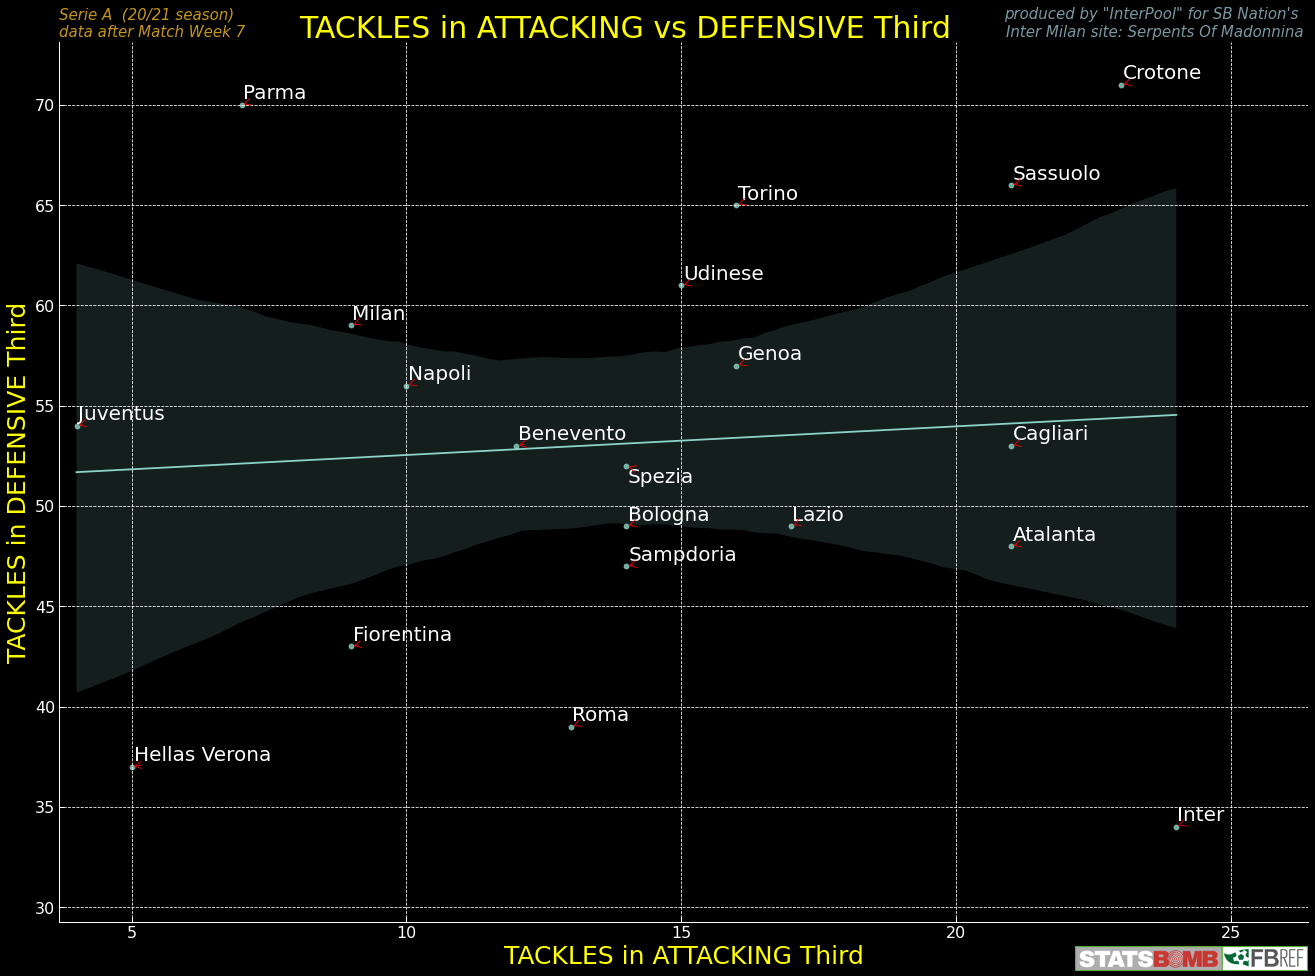

In [47]:
sns.set_context(
                'paper',
                font_scale = 1.8
               )

ax = sns.lmplot(
                x = 'Tkl_Att3rd',                 # horizontal axis

                y = 'Tkl_Def3rd',                 # vertical axis
                
                data = Defensive_Actions_df,      # data source

                fit_reg = True,
                #fit_reg = False,            # do NOT fix a regression line
                
                height = 13,              
                aspect = 1.4      #  dimension of x-axis (sets width)
               )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

x_col_min = Defensive_Actions_df['Tkl_Att3rd'].min()
x_col_max = Defensive_Actions_df['Tkl_Att3rd'].max()

y_col_min = Defensive_Actions_df['Tkl_Def3rd'].min()
y_col_max = Defensive_Actions_df['Tkl_Def3rd'].max()

#plt.xlim((x_col_min - 1), (x_col_max + 1))
#plt.ylim((y_col_min - 1), (y_col_max + 1))

plt.xlim(
         (x_col_min * 0.92), (x_col_max * 1.1)
        )

plt.ylim(
         (y_col_min * 0.86), (y_col_max * 1.03)
        )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#plt.title('TACKLES in ATTACKING vs DEFENSIVE Third - Serie A (20/21) after matchweek 7',
#          fontsize = 26,     # 30,
#          color = 'goldenrod')       # 'mediumaquamarine'

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### identify the source variables in MAIN TITLE:

plt.suptitle('TACKLES in ATTACKING vs DEFENSIVE Third   ',
             
             x = 0.475,
             y = 1.01,
             
             fontsize = 30,
             
             color = 'yellow'
            )


### identify the source time period in SUBTITLE:

plt.title(
          subtitle_2_lines,
          
          loc = 'left',

          fontsize = 15,
          
          alpha = 0.9,
          
          style = 'italic',

          color = 'goldenrod'
         )


### attribute this work to "InterPool" specifically for S.O.M.

plt.title(prod_by_and_for,
          
          loc = 'right',
          
          fontsize = 15,
          
          alpha = 0.7,
          
          style = 'italic',
          
          color = 'lightblue'
         )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.xlabel(
           'TACKLES in ATTACKING Third',
    
           fontsize = 25,
    
           color = 'yellow'
          )

plt.ylabel(
           'TACKLES in DEFENSIVE Third',
    
           fontsize = 25,
    
           color = 'yellow'
          )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.figimage(
             logos_flat_small,
             
             1075,   # 1090
             5
            )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

point_labels = [
                plt.text(
                         Defensive_Actions_df.Tkl_Att3rd[i],
                    
                         Defensive_Actions_df.Tkl_Def3rd[i],
                         
                         Defensive_Actions_df.Squad[i],
                    
                         fontsize = 20
                         
                        ) for i in range(
                                         len(
                                             Defensive_Actions_df.Squad
                                            )
                                        )
               ]
adjust_text(
            point_labels,

            arrowprops = dict(
                              arrowstyle = '->',
                              color = 'red'
                             )
           )

### TACKLES against DRIBBLES — TOTAL vs SUCCESS RATE (all Serie A teams)

6

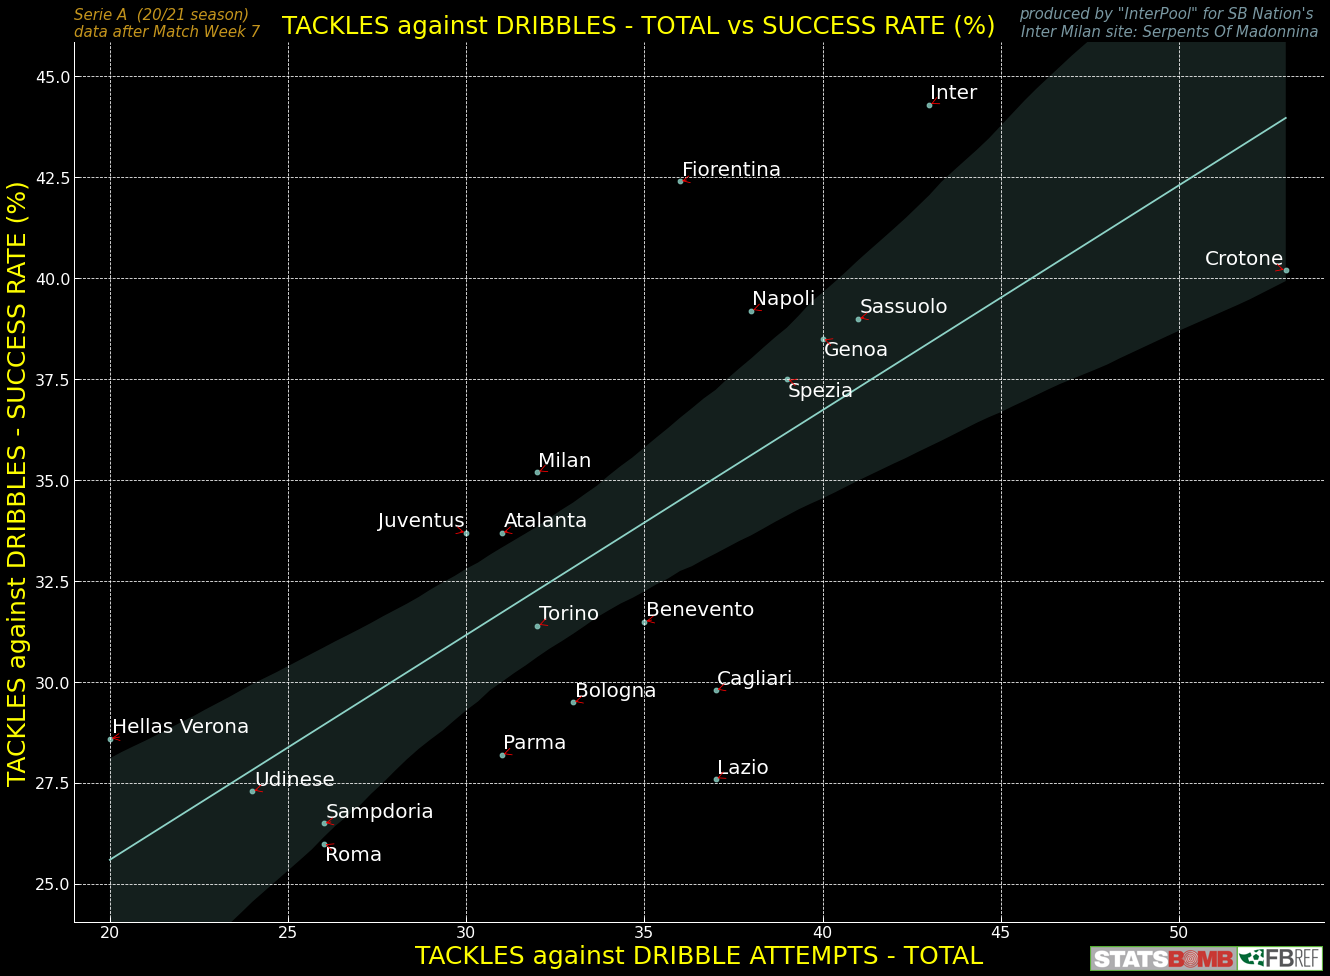

In [48]:
sns.set_context(
                'paper',
                font_scale = 1.8
               )

ax = sns.lmplot(
                x = 'Tkl_vs_Drib',                 # horizontal axis
    
                y = 'Tkl_Pct_vs_Drib',             # vertical axis
                
                data = Defensive_Actions_df,      # data source
    
                fit_reg = True,              # to fix a regression line
                #fit_reg = False,            # for *NO* regression line
                
                height = 13,              
                aspect = 1.4             #  dimension of x-axis (sets width)
               )


#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


x_col_min = Defensive_Actions_df['Tkl_vs_Drib'].min()
x_col_max = Defensive_Actions_df['Tkl_vs_Drib'].max()

y_col_min = Defensive_Actions_df['Tkl_Pct_vs_Drib'].min()
y_col_max = Defensive_Actions_df['Tkl_Pct_vs_Drib'].max()

#plt.xlim((x_col_min - 1), (x_col_max + 1))
#plt.ylim((y_col_min - 1), (y_col_max + 1))

plt.xlim(
         (x_col_min * 0.95),
         (x_col_max * 1.02)
        )

plt.ylim(
         (y_col_min * 0.925),
         (y_col_max * 1.035)
        )


#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


#plt.title('TACKLES against DRIBBLES - TOTAL vs SUCCESS RATE (%) - Serie A (20/21) after matchweek 7',
#          fontsize = 25,
#          color = 'goldenrod')        # 'darkgoldenrod'     # 'mediumseagreen'     # 'yellow'

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### identify the source variables in MAIN TITLE:

plt.suptitle('TACKLES against DRIBBLES - TOTAL vs SUCCESS RATE (%)    ',
             
             x = 0.475,
             y = 1.01,
             
             fontsize = 24.5,
             
             color = 'yellow'
            )


### identify the source time period in SUBTITLE:

plt.title(
          subtitle_2_lines,
          
          loc = 'left',

          fontsize = 15,
          
          alpha = 0.9,
          
          style = 'italic',

          color = 'goldenrod'
         )


### attribute this work to "InterPool" specifically for S.O.M.

plt.title(prod_by_and_for,
          
          loc = 'right',
          
          fontsize = 15,
          
          alpha = 0.7,
          
          style = 'italic',
          
          color = 'lightblue'
         )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.xlabel(
           'TACKLES against DRIBBLE ATTEMPTS - TOTAL',
    
           fontsize = 25,
    
           color = 'yellow'
          )

plt.ylabel(
           'TACKLES against DRIBBLES - SUCCESS RATE (%)',
    
           fontsize = 25,
    
           color = 'yellow'
          )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


#add_image(logos_flat,
#          fig,         # ax,
#          left = 0.9,
#          bottom = 0.1,
#          width = 0.1
#         )
#  NameError: name 'add_image' is not defined

plt.figimage(
             logos_flat_small,    # logos_stacked_small,

#            (fig.bbox.xmax - 400),
             1090,
             5      # ,       # 0
             
             # anchor = 'SE'
             # zorder = 1
            )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


point_labels = [
                plt.text(
                         Defensive_Actions_df.Tkl_vs_Drib[i],
                    
                         Defensive_Actions_df.Tkl_Pct_vs_Drib[i],
                         
                         Defensive_Actions_df.Squad[i],
                    
                         fontsize = 20
                         
                        ) for i in range(
                                         len(
                                             Defensive_Actions_df.Squad
                                            )
                                        )
               ]
adjust_text(
            point_labels,

            arrowprops = dict(
                              arrowstyle = '->',
                              color = 'red'
                             )
           )